## Observations and Insights 

Insight 1:


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharm_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
# Display the data table for preview
pharm_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mouse = pharm_df['Mouse ID'].value_counts()
unique_mouse

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pharm_df.groupby(['Mouse ID', 'Timepoint'])
duplicate_mice


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = pharm_df[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites']]
duplicate_mice_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = duplicate_mice_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mice_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_unique_mouse = clean_mice_df['Mouse ID'].value_counts()
clean_unique_mouse

k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Mean calculation
stats_avg = round(clean_mice_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'], 3)
# Median calculation
stats_median = round(clean_mice_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)'], 3)
# Variance calculation
stats_var = round(clean_mice_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'], 3)
# Standard Deviation calculation
stats_std = round(clean_mice_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'], 3)
# SEM(spread over time) calculation
stats_sem = round(clean_mice_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'], 3)

summary_stats_df = pd.DataFrame({
    "Average": stats_avg, 
    "Median": stats_median, 
    "Variance": stats_var, 
    "STD": stats_std, 
    "SEM/(Spread)": stats_sem
})
summary_stats_df = summary_stats_df.reset_index()
summary_stats_df


,Drug Regimen,Average,Median,Variance,STD,SEM/(Spread)
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.393,50.910,43.139,6.568,0.526
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
stats_df = duplicate_mice_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
stats_df.round(3)

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.323  50.855  42.351  6.508  0.513
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

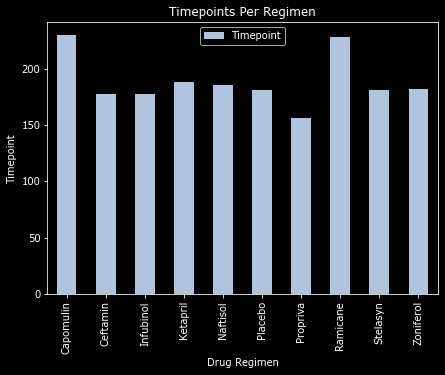

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Group by Drug Regimen
drug_reg = clean_mice_df.groupby('Drug Regimen')
# Numeric timepoint
timepoint = drug_reg['Timepoint'].count()
# Plot Chart
chart = timepoint.plot(kind='bar', color='lightsteelblue', figsize=(7,5))
# Set Labels
chart.set_title('Timepoints Per Regimen')
chart.set_ylabel('Timepoint')
chart.set_xlabel('Drug Regimen')
plt.legend(loc='best')
plt.show()

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

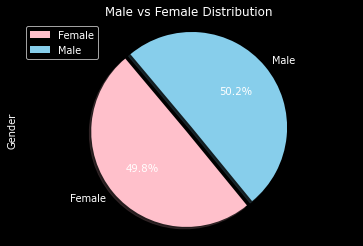

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get count of each gender 
gender_df = clean_mice_df.groupby('Sex').nunique()['Mouse ID']
# Create plot vars
colors = ['pink', 'skyblue']
explode = (0.07, 0)
# Create pie chart
gender_pie = gender_df.plot(kind='pie', y='Gender', title='Male vs Female Distribution', shadow=True, autopct="%1.1f%%", explode=explode, colors=colors, startangle=130);
# Set y axis label
gender_pie.set_ylabel('Gender')
# Make plot round
plt.axis('equal')
# Set legend and location
plt.legend(loc='best')
# Show plot
plt.show()


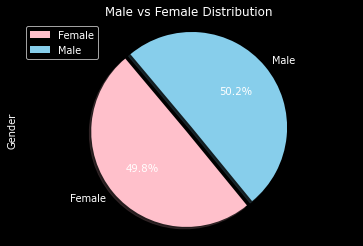

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
colors = ["pink","skyblue"]
explode = (0.07,0)
# Plot with matplotlib
plt.pie(gender_df, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)
# Plot title
plt.title('Male vs Female Distribution')
# Plot y-label
plt.ylabel('Gender')
# Make plot round
plt.axis('equal')
# Set legend and location
plt.legend(loc='best')
# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
